In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import tensorflow as tf
import warnings

warnings.filterwarnings(action = 'ignore')

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [4]:
featuresData = pd.read_csv('C:/Users/home/Desktop/집에 가져갈 것/stddev/dataset/feature_regression_example.csv')

In [5]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [6]:
ynMap = {"Y":1,'N':0}

In [7]:
###np.where, loc, LabelEncoder,dictionary(mapping)
featuresData['PROMO_LE'] = featuresData.PROMOTION.map(ynMap)

In [8]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PROMO_LE
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888,1
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888,1
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361,1
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361,1


In [9]:
featuresData['HOLIDAY_LE'] = featuresData.HOLIDAY.map(ynMap)

In [10]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PROMO_LE,HOLIDAY_LE
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,1,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,1,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888,1,1
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888,1,0
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361,1,0
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361,1,0


### 데이터 분리

In [11]:
label = ['QTY']

In [12]:
features = (set(featuresData.select_dtypes(np.number).columns) - set(label))

In [13]:
stdPercent = 0.8

In [14]:
stdIndex = int(featuresData.shape[0] *stdPercent)

In [15]:
#featuresStd = featuresData.loc[featuresData.index == stdIndex][["YEARWEEK"]]

In [16]:
stdYearweek = featuresData.loc[stdIndex,"YEARWEEK"]

In [17]:
#stdYearweek = featuresStd.values[0]

In [18]:
trainingData_features = featuresData.loc[featuresData.YEARWEEK <= stdYearweek, features]
trainingData_label = featuresData.loc[featuresData.YEARWEEK <= stdYearweek, label]

testData_label = featuresData.loc[featuresData.YEARWEEK > stdYearweek, label]
testData_all = featuresData.loc[featuresData.YEARWEEK > stdYearweek]

### 모델 생성

In [28]:
trainingData_features.loc[0,:].shape

(7,)

In [19]:
inputShape = trainingData_features.loc[0,:].shape

In [29]:
trainingData_features

,PRO_PERCENT,HCLUS,WEEK,HOLIDAY_LE,YEAR,PROMO_LE,YEARWEEK
0,0.209442,1,1,1,2015,1,201501
1,0.209442,4,2,0,2015,1,201502
2,0.208155,4,3,0,2015,1,201503
3,0.208155,2,4,1,2015,1,201504
4,0.208155,4,5,0,2015,1,201505
...,...,...,...,...,...,...,...
80,0.308584,1,28,1,2016,1,201628
81,0.308584,1,29,1,2016,1,201629
82,0.280258,4,30,0,2016,1,201630
83,0.280258,4,31,0,2016,1,201631


In [31]:
trainingData_features.loc[0]

PRO_PERCENT         0.209442
HCLUS               1.000000
WEEK                1.000000
HOLIDAY_LE          1.000000
YEAR             2015.000000
PROMO_LE            1.000000
YEARWEEK       201501.000000
Name: 0, dtype: float64

In [22]:
model = Sequential()

In [23]:
model.add(Dense(units=8, activation="relu", 
                input_shape=inputShape))

In [24]:
model.add(Dense(units=8, activation="relu"))

In [25]:
model.add(Dense(units=4, activation="relu"))

In [40]:
model.add(Dense(units=1))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일

In [42]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [43]:
#model.compile(optimizer=optimizers.Adam(),
# loss=losses.mean_squared_error,
# metrics=[metrics.mean_squared_error, metrics.mean_absolute_error])
model.compile( loss="mean_squared_error",
optimizer = "adam",
metrics = ["mean_squared_error","mean_absolute_error"])

In [44]:
# 라이브러리 및 로그 디렉토리 정의 join
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from datetime import datetime
import os
logdir = os.path.join("logs/fit/",datetime.now().strftime("%Y%m%d_%H%M%S"))

In [46]:
# 콜백 옵션 정의
callback_list =[
EarlyStopping(monitor="val_loss", patience=500),
TensorBoard(log_dir = logdir),
ModelCheckpoint(filepath = "./check/model_r_weights.h5",
verbose = 1,
monitor = "val_loss",
save_best_only = True) ]

In [47]:
model.fit( x=trainingData_features,
y=trainingData_label,
batch_size=32,
epochs=500,
validation_split=0.2,
callbacks = callback_list
)

Epoch 1/500
3/3 [==============================] - 1s 239ms/step - loss: 28501686.0000 - mean_squared_error: 28501686.0000 - mean_absolute_error: 5184.3242 - val_loss: 4386691.0000 - val_mean_squared_error: 4386691.0000 - val_mean_absolute_error: 1956.7201

Epoch 00001: val_loss improved from inf to 4386691.00000, saving model to ./check\model_r_weights.h5
Epoch 2/500
3/3 [==============================] - 0s 17ms/step - loss: 3129797.5000 - mean_squared_error: 3129797.5000 - mean_absolute_error: 1545.0795 - val_loss: 2036326.3750 - val_mean_squared_error: 2036326.3750 - val_mean_absolute_error: 1215.8459

Epoch 00002: val_loss improved from 4386691.00000 to 2036326.37500, saving model to ./check\model_r_weights.h5
Epoch 3/500
3/3 [==============================] - 0s 18ms/step - loss: 1912794.5000 - mean_squared_error: 1912794.5000 - mean_absolute_error: 1102.6106 - val_loss: 2063799.7500 - val_mean_squared_error: 2063799.7500 - val_mean_absolute_error: 1226.8301

Epoch 00003: val_los

In [48]:
# 훈련결과 변수에 저장하면서 훈련
history = model.fit( x=trainingData_features,
y=trainingData_label,
batch_size=32,
epochs=500,
validation_split=0.2,
#callbacks = callback_list
)

Epoch 1/500
3/3 [==============================] - 0s 32ms/step - loss: 1923493.0000 - mean_squared_error: 1923493.0000 - mean_absolute_error: 1106.5762 - val_loss: 2060394.8750 - val_mean_squared_error: 2060394.8750 - val_mean_absolute_error: 1225.4414
Epoch 2/500
3/3 [==============================] - 0s 15ms/step - loss: 1923486.7500 - mean_squared_error: 1923486.7500 - mean_absolute_error: 1106.5732 - val_loss: 2060388.2500 - val_mean_squared_error: 2060388.2500 - val_mean_absolute_error: 1225.4387
Epoch 3/500
3/3 [==============================] - 0s 16ms/step - loss: 1923480.5000 - mean_squared_error: 1923480.5000 - mean_absolute_error: 1106.5706 - val_loss: 2060381.6250 - val_mean_squared_error: 2060381.6250 - val_mean_absolute_error: 1225.4362
Epoch 4/500
3/3 [==============================] - 0s 17ms/step - loss: 1923474.7500 - mean_squared_error: 1923474.7500 - mean_absolute_error: 1106.5680 - val_loss: 2060375.2500 - val_mean_squared_error: 2060375.2500 - val_mean_absolute_e

In [49]:
history

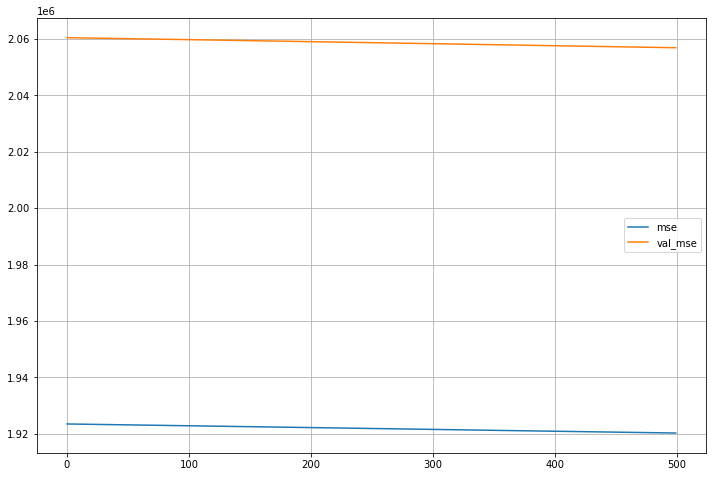

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
# 훈련 데이터의 mse
plt.plot(history.history['mean_squared_error'])
# 검증 데이터의 mse
plt.plot(history.history['val_mean_squared_error'])
plt.legend(['mse','val_mse'])
plt.grid()
plt.show()

In [51]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,mean_absolute_error,val_loss,val_mean_squared_error,val_mean_absolute_error,epoch
495,1920307.25,1920307.25,1105.135986,2056867.00,2056867.00,1224.001221,495
496,1920301.25,1920301.25,1105.133057,2056859.75,2056859.75,1223.998413,496
497,1920294.25,1920294.25,1105.130005,2056852.75,2056852.75,1223.995361,497
498,1920287.75,1920287.75,1105.127075,2056844.75,2056844.75,1223.992188,498
499,1920280.75,1920280.75,1105.123779,2056837.00,2056837.00,1223.989136,499
